In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn import linear_model
import copy

In [3]:
df = pd.read_csv('/kaggle/input/aviachipta-narxini-bashorat-qilish/train_data.csv')
df.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


In [4]:
encoder = OrdinalEncoder()
text = df[['airline', 'flight','source_city','departure_time','stops','arrival_time','destination_city','class']]
df[['airline', 'flight','source_city','departure_time','stops','arrival_time','destination_city','class']]=encoder.fit_transform(text)

In [5]:
df.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,5.0,1214.0,0.0,1.0,0.0,5.0,5.0,1.0,14.25,21,7212
1,2,4.0,1126.0,3.0,2.0,2.0,5.0,4.0,1.0,1.75,7,5292
2,3,5.0,1245.0,0.0,4.0,0.0,2.0,2.0,0.0,9.58,5,60553
3,4,5.0,1191.0,4.0,4.0,0.0,2.0,3.0,1.0,6.75,28,5760
4,5,3.0,275.0,1.0,1.0,2.0,4.0,5.0,1.0,2.00,4,10712


In [23]:
drop = ['id', 'price']
x = df.drop(drop, axis=1)
y = df['price']

x = x.sample(100)
y = y.sample(100)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=2)

print(f'x_train = {x_train.shape}')
print(f'x_test = {x_test.shape}')
print(f'y_train = {y_train.shape}')
print(f'y_test = {y_test.shape}')

x_train = (60, 10)
x_test = (40, 10)
y_train = (60,)
y_test = (40,)


In [24]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# develop a model without library

prediction function

In [25]:
def predict(x, w, b):
  m = x.shape[0]
  f_wb = np.zeros(m)
  for i in range(m):
    f_wb[i] = np.dot(x[i], w) + b
  return f_wb

cost function

In [26]:
def compute_cost(x, y, w, b):
  m = x.shape[0]
  cost = 0
  for i in range(m):
    f_wb = np.dot(x[i], w)+ b
    cost = cost + ((y[i] - f_wb)** 2)
  total_cost = 1 / (2 * m) * cost
  return total_cost

derivative function

In [27]:
def compute_gradient(x, y, w, b):
  m,n = x.shape
  dj_dw = np.zeros(n)
  dj_db = 0
  for i in range(m):
    f_wb = np.dot(x[i], w)+b
    err = f_wb - y[i]

    for j in range(n):
      dj_dw[j] = dj_dw[j] + err * x[i, j]
    dj_db = dj_db + err
    
  dj_dw = dj_dw / m
  dj_db = dj_db / m
  return dj_dw, dj_db


gradient descent function

In [28]:
def compute_gradient_descent(x, y, w_in, b_in, alpha, iter, cost, gradient):
  J_hist = []
  p_hist = []
  w = copy.deepcopy(w_in)
  b = b_in
  for i in range(iter):
    dj_dw, dj_db = gradient(x, y, w, b)

    w = w - alpha * dj_dw
    b = b - alpha * dj_db

    if i < 100000:
      J_hist.append(cost(x, y, w, b))
      p_hist.append(np.array([w, b]))

  return J_hist, p_hist, w, b

In [29]:
w_in = np.array([1 ,1, 1, 1, 1, 1, 1, 1, 1, 1])
b_in = 1
alpha = 0.01
iter_n = 1000

In [30]:
J_hist, p_hist, w, b, = compute_gradient_descent(x_train, y_train, w_in, b_in, alpha, iter_n, compute_cost,compute_gradient)

/tmp/ipykernel_32/2342253486.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  p_hist.append(np.array([w, b]))
/tmp/ipykernel_32/4065781470.py:6: RuntimeWarning: overflow encountered in double_scalars
  cost = cost + ((y[i] - f_wb)** 2)
/tmp/ipykernel_32/3548651385.py:10: RuntimeWarning: overflow encountered in double_scalars
  dj_dw[j] = dj_dw[j] + err * x[i, j]
/tmp/ipykernel_32/3548651385.py:10: RuntimeWarning: invalid value encountered in double_scalars
  dj_dw[j] = dj_dw[j] + err * x[i, j]


In [31]:
f_wb = predict(x_test,w_in, b_in)
predictions = pd.DataFrame({'predicted vaue':f_wb, 'real value':y_test})
predictions.head()

,predicted vaue,real value
0,1245.00,57081
1,1380.42,10018
2,1345.83,35520
3,1304.42,4099
4,773.00,4755


In [32]:
ms_error = compute_cost(x_test, y_test, w_in, b_in)
print(np.sqrt(ms_error))

22186.355873114284


# Linear model with scklearn

In [33]:
df.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,5.0,1214.0,0.0,1.0,0.0,5.0,5.0,1.0,14.25,21,7212
1,2,4.0,1126.0,3.0,2.0,2.0,5.0,4.0,1.0,1.75,7,5292
2,3,5.0,1245.0,0.0,4.0,0.0,2.0,2.0,0.0,9.58,5,60553
3,4,5.0,1191.0,4.0,4.0,0.0,2.0,3.0,1.0,6.75,28,5760
4,5,3.0,275.0,1.0,1.0,2.0,4.0,5.0,1.0,2.00,4,10712


In [34]:
drop = ['id', 'price']

x = df.drop(drop, axis=1)
y = df[['price']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=1)

print(f'x_train = {x_train.shape}')
print(f'x_test = {x_test.shape}')
print(f'y_train = {y_train.shape}')
print(f'y_test = {y_test.shape}')

x_train = (12000, 10)
x_test = (8000, 10)
y_train = (12000, 1)
y_test = (8000, 1)


In [35]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [36]:
y_hat = model.predict(x_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

6838.06135634057


# develop model by scaling

In [37]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [38]:
model = LinearRegression()

model.fit(x_train_scaled, y_train)

LinearRegression()

In [39]:
y_hat = model.predict(x_test_scaled)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

6846.163556619121


# develop model by Polynomial feature

In [41]:
poly = PolynomialFeatures(degree=5, include_bias=False)

x_train_mapped = poly.fit_transform(x_train)
x_test_mapped = poly.fit_transform(x_test)

In [42]:
model = LinearRegression()
model.fit(x_train_mapped, y_train)

LinearRegression()

In [43]:
y_hat_train = model.predict(x_train_mapped)
mse_train = mean_squared_error(y_train , y_hat_train)
print(f'train mse {np.sqrt(mse_train)}')
y_hat_test = model.predict(x_test_mapped)
mse_test = mean_squared_error(y_test, y_hat_test)
print(f'test mse = {np.sqrt(mse_test)}')

train mse 4065.543880586558
test mse = 5160.868175379131


# develop model performance by feature engineering

In [8]:
df.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,5.0,1214.0,0.0,1.0,0.0,5.0,5.0,1.0,14.25,21,7212
1,2,4.0,1126.0,3.0,2.0,2.0,5.0,4.0,1.0,1.75,7,5292
2,3,5.0,1245.0,0.0,4.0,0.0,2.0,2.0,0.0,9.58,5,60553
3,4,5.0,1191.0,4.0,4.0,0.0,2.0,3.0,1.0,6.75,28,5760
4,5,3.0,275.0,1.0,1.0,2.0,4.0,5.0,1.0,2.00,4,10712


In [9]:
df['waiting_time'] = (df['days_left']*24)-df['duration']
df.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,waiting_time
0,1,5.0,1214.0,0.0,1.0,0.0,5.0,5.0,1.0,14.25,21,7212,489.75
1,2,4.0,1126.0,3.0,2.0,2.0,5.0,4.0,1.0,1.75,7,5292,166.25
2,3,5.0,1245.0,0.0,4.0,0.0,2.0,2.0,0.0,9.58,5,60553,110.42
3,4,5.0,1191.0,4.0,4.0,0.0,2.0,3.0,1.0,6.75,28,5760,665.25
4,5,3.0,275.0,1.0,1.0,2.0,4.0,5.0,1.0,2.00,4,10712,94.00


In [46]:
drop = ['id', 'price']

x = df.drop(drop, axis=1)
y = df[['price']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=1)

print(f'x_train = {x_train.shape}')
print(f'x_test = {x_test.shape}')
print(f'y_train = {y_train.shape}')
print(f'y_test = {y_test.shape}')

x_train = (12000, 11)
x_test = (8000, 11)
y_train = (12000, 1)
y_test = (8000, 1)


In [50]:
poly = PolynomialFeatures(degree=5, include_bias=False)

x_train_mapped = poly.fit_transform(x_train)
x_test_mapped = poly.fit_transform(x_test)

#scaler = StandardScaler()

#x_train_mapped_scaled = scaler.fit_transform(x_train_mapped)
#x_test_mapped_scaled = scaler.fit_transform(x_test_mapped)

In [48]:
#model = LinearRegression()
#model.fit(x_train_mapped_scaled, y_train)

LinearRegression()

In [49]:
#y_hat_train = model.predict(x_train_mapped_scaled)
#mse_train = mean_squared_error(y_train , y_hat_train)
#print(f'train mse {np.sqrt(mse_train)}')
#y_hat_test = model.predict(x_test_mapped_scaled)
#mse_test = mean_squared_error(y_test, y_hat_test)
#print(f'test mse = {np.sqrt(mse_test)}')

train mse 3752.331857853465
test mse = 2491072117987.0684


In [51]:
model = LinearRegression()
model.fit(x_train_mapped, y_train)

LinearRegression()

In [52]:
y_hat_train = model.predict(x_train_mapped)
mse_train = mean_squared_error(y_train , y_hat_train)
print(f'train mse {np.sqrt(mse_train)}')
y_hat_test = model.predict(x_test_mapped)
mse_test = mean_squared_error(y_test, y_hat_test)
print(f'test mse = {np.sqrt(mse_test)}')

train mse 4542.022441113951
test mse = 5671.649827051254


# work on bais and veriabce

In [53]:
df.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,waiting_time
0,1,5.0,1214.0,0.0,1.0,0.0,5.0,5.0,1.0,14.25,21,7212,489.75
1,2,4.0,1126.0,3.0,2.0,2.0,5.0,4.0,1.0,1.75,7,5292,166.25
2,3,5.0,1245.0,0.0,4.0,0.0,2.0,2.0,0.0,9.58,5,60553,110.42
3,4,5.0,1191.0,4.0,4.0,0.0,2.0,3.0,1.0,6.75,28,5760,665.25
4,5,3.0,275.0,1.0,1.0,2.0,4.0,5.0,1.0,2.00,4,10712,94.00


In [54]:
drop_col = ['id', 'price']

x = df.drop(drop_col, axis=1)
y = df[['price']]

x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.40, random_state=1)
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=.50, random_state=1)

print(f'x_train ={x_train.shape}')
print(f'x_cv = {x_cv.shape}')
print(f'x_test = {x_test.shape}')
print(f'y_train = {y_train.shape}')
print(f'y_cv = {y_cv.shape}')
print(f'y_test = {y_test.shape}')

x_train =(12000, 11)
x_cv = (4000, 11)
x_test = (4000, 11)
y_train = (12000, 1)
y_cv = (4000, 1)
y_test = (4000, 1)


In [55]:
train_err = []
cv_err = []
degrees = np.array([1, 2, 3, 4, 5])

for i in degrees:
  poly = PolynomialFeatures(degree= i, include_bias=False)
  x_train_mapped = poly.fit_transform(x_train)

  model = LinearRegression()
  model.fit(x_train_mapped, y_train)

  train_yhat = model.predict(x_train_mapped)
  train_mse = np.sqrt(mean_squared_error(y_train, train_yhat))
  train_err.append(train_mse)

  x_cv_mapped = poly.fit_transform(x_cv)
  
  cv_yhat = model.predict(x_cv_mapped)
  cv_mse = np.sqrt(mean_squared_error(y_cv, cv_yhat))
  cv_err.append(cv_mse)

/tmp/ipykernel_32/853012691.py:5: UserWarning: The label '_' of ' ' starts with '_'. It is thus excluded from the legend.
  plt.legend('train error', 'test _error')
/tmp/ipykernel_32/853012691.py:5: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend('train error', 'test _error')


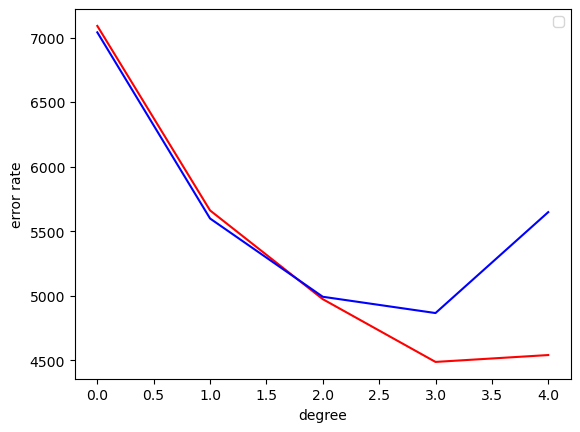

In [58]:
plt.plot(train_err, color='red', label='train')
plt.xlabel('degree')
plt.plot(cv_err, color='blue', label='test')
plt.ylabel('error rate')
plt.legend('train error', 'test _error')
plt.show()

In [59]:
print(train_err)
print(cv_err)

[7089.866973113993, 5661.664927231925, 4974.633875679656, 4488.771603309474, 4542.022441113951]
[7040.188534913973, 5599.122623754839, 4993.205523713798, 4867.110856272108, 5648.330864322872]


# regularization

In [60]:
train_err = []
cv_err = []
lambdas = np.array([ 1e-4,1e-3,1e-2, 1e-1,1,10,100, 200, 500])

for i in lambdas:
  poly = PolynomialFeatures(degree= 4, include_bias=False)
  x_train_mapped = poly.fit_transform(x_train)

  model = linear_model.Ridge(alpha = i)
  model.fit(x_train_mapped, y_train)

  tr_yhat = model.predict(x_train_mapped)
  tr_mse = np.sqrt(mean_squared_error(y_train, tr_yhat))
  train_err.append(tr_mse)

  x_cv_mapped = poly.fit_transform(x_cv)
  
  cv_yhat = model.predict(x_cv_mapped)
  cv_mse = np.sqrt(mean_squared_error(y_cv, cv_yhat))
  cv_err.append(cv_mse)

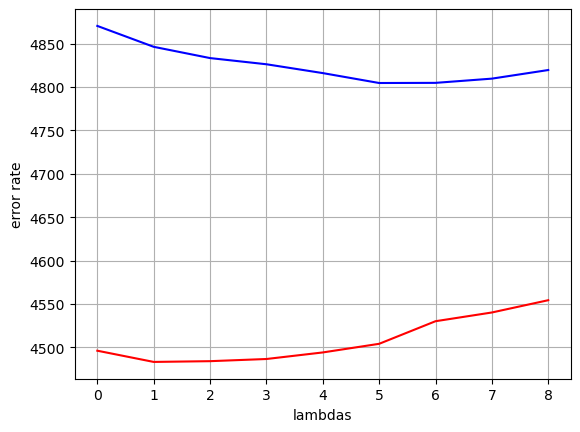

In [65]:
plt.plot(train_err, color='red', label='train')
plt.xlabel('lambdas')
plt.plot(cv_err, color='blue', label='test')
plt.ylabel('error rate')
plt.grid()
plt.show()

# the best linear model

In [66]:
df.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,waiting_time
0,1,5.0,1214.0,0.0,1.0,0.0,5.0,5.0,1.0,14.25,21,7212,489.75
1,2,4.0,1126.0,3.0,2.0,2.0,5.0,4.0,1.0,1.75,7,5292,166.25
2,3,5.0,1245.0,0.0,4.0,0.0,2.0,2.0,0.0,9.58,5,60553,110.42
3,4,5.0,1191.0,4.0,4.0,0.0,2.0,3.0,1.0,6.75,28,5760,665.25
4,5,3.0,275.0,1.0,1.0,2.0,4.0,5.0,1.0,2.00,4,10712,94.00


In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=1)

In [68]:
poly = PolynomialFeatures(degree=4, include_bias=False)

x_train_mapped = poly.fit_transform(x_train)
x_test_mapped = poly.fit_transform(x_test)

model = LinearRegression()
model.fit(x_train_mapped, y_train)

LinearRegression()

In [69]:
yhat = model.predict(x_test_mapped)
mae = mean_absolute_error(y_test, yhat)
mse = mean_squared_error(y_test, yhat)

print(f"mean absolute error {mae}")
print(f'mean squared error {np.sqrt(mse)}')

mean absolute error 3051.6339624084794
mean squared error 4885.761415980888


# neurol network development

In [70]:
import copy
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [73]:
data = pd.read_csv('/kaggle/input/aviachipta-narxini-bashorat-qilish/train_data.csv')
data.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


In [80]:
encoder = OrdinalEncoder()
text = data[['airline', 'flight','source_city','departure_time','stops','arrival_time','destination_city','class']]
data[['airline', 'flight','source_city','departure_time','stops','arrival_time','destination_city','class']]=encoder.fit_transform(text)

In [82]:
drop = ['id', 'price']
x = data.drop(drop, axis=1)
y = data[['price']]


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=2)


print(f'x_train = {x_train.shape}')
print(f'x_test = {x_test.shape}')
print(f'y_train = {y_train.shape}')
print(f'y_test = {y_test.shape}')

x_train = (12000, 10)
x_test = (8000, 10)
y_train = (12000, 1)
y_test = (8000, 1)


In [83]:
model = Sequential(
    [
        Dense(140, activation='relu', name='l1'),
        Dense(40, activation='relu', name='l2'),
        Dense(1, activation='linear', name='l3')
    ]
)

model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
)

model.fit(
    x_train, y_train, 
    epochs=100
)

Epoch 1/100
375/375 [==============================] - 1s 1ms/step - loss: 594131712.0000
Epoch 2/100
375/375 [==============================] - 1s 2ms/step - loss: 471026208.0000
Epoch 3/100
375/375 [==============================] - 1s 1ms/step - loss: 468425504.0000
Epoch 4/100
375/375 [==============================] - 1s 2ms/step - loss: 465783744.0000
Epoch 5/100
375/375 [==============================] - 1s 1ms/step - loss: 462502848.0000
Epoch 6/100
375/375 [==============================] - 1s 1ms/step - loss: 457781952.0000
Epoch 7/100
375/375 [==============================] - 1s 1ms/step - loss: 452663520.0000
Epoch 8/100
375/375 [==============================] - 1s 1ms/step - loss: 446181280.0000
Epoch 9/100
375/375 [==============================] - 1s 1ms/step - loss: 440211648.0000
Epoch 10/100
375/375 [==============================] - 1s 2ms/step - loss: 433999136.0000
Epoch 11/100
375/375 [==============================] - 1s 1ms/step - loss: 425592704.0000
Epoch 12

In [84]:
yhat_tr = model.predict(x_train)
mse_tr  = mean_squared_error(y_train, yhat_tr)
print(f'training error {np.sqrt(mse_tr)}')

yhat_te = model.predict(x_test)
mse_te = mean_squared_error(y_test, yhat_te)
print(f'test error {np.sqrt(mse_te)}')

375/375 [==============================] - 1s 1ms/step
training error 6457.7453920029375
250/250 [==============================] - 0s 1ms/step
test error 6263.246002897806


# improve model performance by scaling

In [85]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [86]:
model= Sequential(
    [
        Dense(140, activation='relu', name='l1'),
        Dense(40, activation='relu', name='l2'),
        Dense(1, activation='linear', name='l3')
        ]
    )  
  

model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    )
  
model.fit(
    x_train_scaled, y_train,
    epochs = 100
    )

Epoch 1/100
375/375 [==============================] - 1s 2ms/step - loss: 927419712.0000
Epoch 2/100
375/375 [==============================] - 1s 2ms/step - loss: 600436416.0000
Epoch 3/100
375/375 [==============================] - 1s 1ms/step - loss: 242519056.0000
Epoch 4/100
375/375 [==============================] - 1s 2ms/step - loss: 105989240.0000
Epoch 5/100
375/375 [==============================] - 1s 2ms/step - loss: 53561572.0000
Epoch 6/100
375/375 [==============================] - 1s 2ms/step - loss: 42771644.0000
Epoch 7/100
375/375 [==============================] - 1s 2ms/step - loss: 41094408.0000
Epoch 8/100
375/375 [==============================] - 1s 2ms/step - loss: 40379128.0000
Epoch 9/100
375/375 [==============================] - 1s 2ms/step - loss: 39817052.0000
Epoch 10/100
375/375 [==============================] - 1s 2ms/step - loss: 39298744.0000
Epoch 11/100
375/375 [==============================] - 1s 2ms/step - loss: 38785344.0000
Epoch 12/100
37

In [88]:
yhat_train = model.predict(x_train_scaled)
train_mse = mean_squared_error(y_train, yhat_train)
print(f'train error afer scaling {np.sqrt(train_mse)}')

yhat_test = model.predict(x_test_scaled)
test_error = mean_squared_error(y_test, yhat_test)
print(f'test error after scaling {np.sqrt(test_error)}')

375/375 [==============================] - 0s 1ms/step
train error afer scaling 5886.796908737207
250/250 [==============================] - 0s 1ms/step
test error after scaling 5706.86024902918


# develop by Polynomial feature

In [97]:
poly = PolynomialFeatures(degree=5, include_bias=False)
x_train_mapped = poly.fit_transform(x_train)

model = Sequential(
      [
          Dense(25, activation='relu', name='l1'),
          Dense(15,  activation='relu', name='l2'),
          Dense(1,   activation='relu', name='l3')
      ]
  )
model.compile(
      loss = tf.keras.losses.MeanSquaredError(),
      optimizer = tf.keras.optimizers.Adam(0.00000001)
  )
model.fit(
      x_train_mapped, y_train,
      epochs=50
  )

Epoch 1/50
375/375 [==============================] - 1s 2ms/step - loss: 1162943488.0000
Epoch 2/50
375/375 [==============================] - 1s 2ms/step - loss: 1162840704.0000
Epoch 3/50
375/375 [==============================] - 1s 2ms/step - loss: 1162723968.0000
Epoch 4/50
375/375 [==============================] - 1s 2ms/step - loss: 1162597632.0000
Epoch 5/50
375/375 [==============================] - 1s 2ms/step - loss: 1162488192.0000
Epoch 6/50
375/375 [==============================] - 1s 3ms/step - loss: 1162387584.0000
Epoch 7/50
375/375 [==============================] - 1s 2ms/step - loss: 1162263808.0000
Epoch 8/50
375/375 [==============================] - 1s 2ms/step - loss: 1162153600.0000
Epoch 9/50
375/375 [==============================] - 1s 2ms/step - loss: 1162041728.0000
Epoch 10/50
375/375 [==============================] - 1s 2ms/step - loss: 1161919232.0000
Epoch 11/50
375/375 [==============================] - 1s 2ms/step - loss: 1161799808.0000
Epoch 12

In [98]:
tr_yhat = model.predict(x_train_mapped)
tr_mse = np.sqrt(mean_squared_error(y_train, tr_yhat))
print(f'train eror {tr_mse}')

x_test_mapped = poly.fit_transform(x_test)

test_yhat = model.predict(x_test_mapped)
test_mse = np.sqrt(mean_squared_error(y_test, test_yhat))
print(f'test error {test_yhat}')

375/375 [==============================] - 1s 2ms/step
train eror 34019.03479085925
250/250 [==============================] - 0s 1ms/step
test error [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


# work on bais and veriance

In [99]:
data.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,5.0,1214.0,0.0,1.0,0.0,5.0,5.0,1.0,14.25,21,7212
1,2,4.0,1126.0,3.0,2.0,2.0,5.0,4.0,1.0,1.75,7,5292
2,3,5.0,1245.0,0.0,4.0,0.0,2.0,2.0,0.0,9.58,5,60553
3,4,5.0,1191.0,4.0,4.0,0.0,2.0,3.0,1.0,6.75,28,5760
4,5,3.0,275.0,1.0,1.0,2.0,4.0,5.0,1.0,2.00,4,10712


# here I used also feature enginerring

In [100]:
data['waiting_time'] = ((data['days_left']* 24) - data['duration']) /24

In [101]:
drop_col = ['id', 'price']

x = data.drop(drop, axis=1)
y = data[['price']]

x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.40, random_state=1)
x_cv , x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

print(f'train x = {x_train.shape}')
print(f'train y = {y_train.shape}')
print(f'cv x = {x_cv.shape}')
print(f'cv y = {y_cv.shape}')
print(f'test x = {x_test.shape}')
print(f'test y = {y_test.shape}')

train x = (12000, 11)
train y = (12000, 1)
cv x = (4000, 11)
cv y = (4000, 1)
test x = (4000, 11)
test y = (4000, 1)


In [102]:
train_err = []
cv_err = []

for i in range(1, 5):
  poly = PolynomialFeatures(degree=i, include_bias=False)
  x_train_mapped = poly.fit_transform(x_train)

  model = Sequential(
      [
          Dense(25, activation='relu', name='l1'),
          Dense(15,  activation='relu', name='l2'),
          Dense(1,   activation='relu', name='l3')
      ]
  )
  model.compile(
      loss = tf.keras.losses.MeanSquaredError(),
      optimizer = tf.keras.optimizers.Adam(0.00001)
  )
  model.fit(
      x_train_mapped, y_train,
      epochs=10
  )
  tr_yhat = model.predict(x_train_mapped)
  tr_mse = np.sqrt(mean_squared_error(y_train, tr_yhat))
  train_err.append(tr_mse)

  x_cv_mapped = poly.fit_transform(x_cv)

  cv_yhat = model.predict(x_cv_mapped)
  cv_mse = np.sqrt(mean_squared_error(y_cv, cv_yhat))
  cv_err.append(cv_mse)

Epoch 1/10
375/375 [==============================] - 1s 2ms/step - loss: 952360704.0000
Epoch 2/10
375/375 [==============================] - 1s 2ms/step - loss: 952360384.0000
Epoch 3/10
375/375 [==============================] - 0s 1ms/step - loss: 952360960.0000
Epoch 4/10
375/375 [==============================] - 1s 1ms/step - loss: 952361088.0000
Epoch 5/10
375/375 [==============================] - 1s 1ms/step - loss: 952360832.0000
Epoch 6/10
375/375 [==============================] - 1s 1ms/step - loss: 952360384.0000
Epoch 7/10
375/375 [==============================] - 1s 1ms/step - loss: 952361216.0000
Epoch 8/10
375/375 [==============================] - 1s 1ms/step - loss: 952360960.0000
Epoch 9/10
375/375 [==============================] - 1s 1ms/step - loss: 952360768.0000
Epoch 10/10
125/125 [==============================] - 0s 954us/step
Epoch 1/10
375/375 [==============================] - 37s 2ms/step - loss: 952349824.0000
Epoch 2/10
375/375 [====================

In [103]:
print(train_err)
print(cv_err)

[30860.341895995247, 22434.25657145976, 58460.504536200606, 30860.344808302667]
[31136.290597802064, 22388.30154795927, 55411.18705315159, 31136.294472604637]


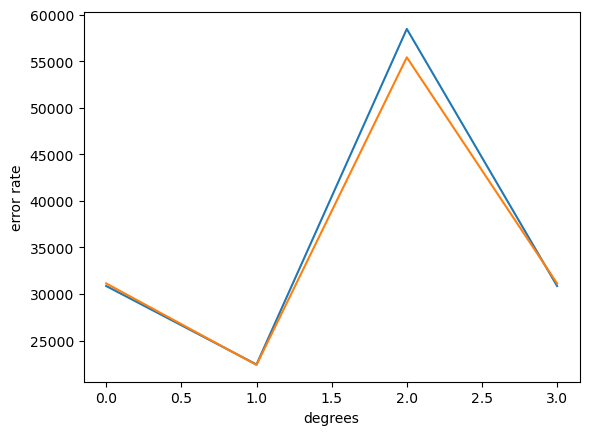

In [105]:
plt.plot(train_err)
plt.xlabel('degrees')
plt.plot(cv_err)
plt.ylabel('error rate')
plt.show()

# regularization

In [106]:
train_err = []
cv_err = []
reg = [0.001, 0.01, 0.1, 1, 10, 50]

for i in range(len(reg)):
  lambda_ = reg[i]
  poly = PolynomialFeatures(degree=2, include_bias=False)
  x_train_mapped = poly.fit_transform(x_train)

  model = Sequential(
      [
          Dense(25, activation='relu', name='l1', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
          Dense(15,  activation='relu', name='l2', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
          Dense(1,   activation='relu', name='l3', kernel_regularizer=tf.keras.regularizers.l2(lambda_))
      ]
  )
  model.compile(
      loss = tf.keras.losses.MeanSquaredError(),
      optimizer = tf.keras.optimizers.Adam(0.00001)
  )
  model.fit(
      x_train_mapped, y_train,
      epochs=10
  )
  tr_yhat = model.predict(x_train_mapped)
  tr_mse = np.sqrt(mean_squared_error(y_train, tr_yhat))
  train_err.append(tr_mse)

  x_cv_mapped = poly.fit_transform(x_cv)

  cv_yhat = model.predict(x_cv_mapped)
  cv_mse = np.sqrt(mean_squared_error(y_cv, cv_yhat))
  cv_err.append(cv_mse)

Epoch 1/10
375/375 [==============================] - 1s 2ms/step - loss: 40524206080.0000
Epoch 2/10
375/375 [==============================] - 1s 2ms/step - loss: 29286084608.0000
Epoch 3/10
375/375 [==============================] - 1s 2ms/step - loss: 20569976832.0000
Epoch 4/10
375/375 [==============================] - 1s 1ms/step - loss: 14003406848.0000
Epoch 5/10
375/375 [==============================] - 1s 1ms/step - loss: 9173361664.0000
Epoch 6/10
375/375 [==============================] - 1s 2ms/step - loss: 5733166080.0000
Epoch 7/10
375/375 [==============================] - 1s 2ms/step - loss: 3407381504.0000
Epoch 8/10
375/375 [==============================] - 1s 1ms/step - loss: 1959603840.0000
Epoch 9/10
375/375 [==============================] - 1s 1ms/step - loss: 1173460224.0000
Epoch 10/10
125/125 [==============================] - 0s 937us/step
Epoch 1/10
375/375 [==============================] - 1s 2ms/step - loss: 9206245376.0000
Epoch 2/10
375/375 [=======

In [107]:
print(train_err)
print(cv_err)

[25541.365910850178, 22537.623440650004, 30859.851767960343, 30860.344808302667, 22296.431710212826, 25856.79047181731]
[25607.616195426624, 22557.48982029873, 31135.649386072324, 31136.294472604637, 22291.855564871064, 25904.955939595067]


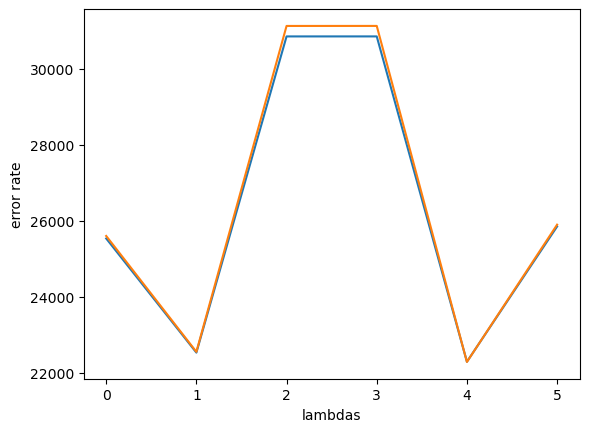

In [108]:
plt.plot(train_err)
plt.xlabel('lambdas')
plt.plot(cv_err)
plt.ylabel('error rate')
plt.show()

# the perfect neurol model

In [109]:
poly = PolynomialFeatures(degree=2, include_bias=False)

x_train_mapped = poly.fit_transform(x_train)
x_cv_mapped = poly.fit_transform(x_cv)
x_test_mapped = poly.fit_transform(x_test)

In [110]:
scaler = StandardScaler()

x_train_mapped_scaled = scaler.fit_transform(x_train_mapped)
x_cv_mapped_scaled = scaler.fit_transform(x_cv_mapped)
x_test_mapped_scaled = scaler.fit_transform(x_test_mapped)

In [112]:
model = Sequential(
    [
        Dense(140, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(10), name='l1'),
        Dense(40, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(10), name='l2'),
        Dense(1, activation='relu',  kernel_regularizer = tf.keras.regularizers.l2(10), name='l3')
    ]
)

model.compile(
    loss = tf.keras.losses.MeanSquaredError(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
)

model.fit(
    x_train_mapped_scaled, y_train,
    epochs = 1000
)

Epoch 1/1000
375/375 [==============================] - 1s 2ms/step - loss: 951914752.0000
Epoch 2/1000
375/375 [==============================] - 1s 2ms/step - loss: 948007744.0000
Epoch 3/1000
375/375 [==============================] - 1s 2ms/step - loss: 934979136.0000
Epoch 4/1000
375/375 [==============================] - 1s 2ms/step - loss: 909112128.0000
Epoch 5/1000
375/375 [==============================] - 1s 2ms/step - loss: 869069760.0000
Epoch 6/1000
375/375 [==============================] - 1s 2ms/step - loss: 815767232.0000
Epoch 7/1000
375/375 [==============================] - 1s 2ms/step - loss: 751050688.0000
Epoch 8/1000
375/375 [==============================] - 1s 2ms/step - loss: 677366144.0000
Epoch 9/1000
375/375 [==============================] - 1s 2ms/step - loss: 598296128.0000
Epoch 10/1000
375/375 [==============================] - 1s 2ms/step - loss: 517850528.0000
Epoch 11/1000
375/375 [==============================] - 1s 2ms/step - loss: 440042592.00

In [113]:
train_yhat = model.predict(x_train_mapped_scaled)
train_mse = mean_squared_error(y_train, train_yhat)
print(f'train set error {np.sqrt(train_mse)}')

test_yhat = model.predict(x_test_mapped_scaled)
test_mse = mean_squared_error(y_test, test_yhat)
print(f'test error {np.sqrt(test_mse)}')

375/375 [==============================] - 1s 1ms/step
train set error 5159.552794609854
125/125 [==============================] - 0s 979us/step
test error 5221.807481012416


# decision tree algorithms development prosses

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

In [17]:
df.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,waiting_time
0,1,5.0,1214.0,0.0,1.0,0.0,5.0,5.0,1.0,14.25,21,7212,489.75
1,2,4.0,1126.0,3.0,2.0,2.0,5.0,4.0,1.0,1.75,7,5292,166.25
2,3,5.0,1245.0,0.0,4.0,0.0,2.0,2.0,0.0,9.58,5,60553,110.42
3,4,5.0,1191.0,4.0,4.0,0.0,2.0,3.0,1.0,6.75,28,5760,665.25
4,5,3.0,275.0,1.0,1.0,2.0,4.0,5.0,1.0,2.00,4,10712,94.00


In [19]:
drop = ['id', 'price']
x = df.drop(drop, axis=1)
y = df['price']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=2)

print(f'x_train = {x_train.shape}')
print(f'x_test = {x_test.shape}')
print(f'y_train = {y_train.shape}')
print(f'y_test = {y_test.shape}')

x_train = (12000, 11)
x_test = (8000, 11)
y_train = (12000,)
y_test = (8000,)


In [117]:
model = DecisionTreeRegressor()

model.fit(x_train, y_train)

DecisionTreeRegressor()

In [118]:
train_yhat = model.predict(x_train)
train_mse = mean_squared_error(y_train, train_yhat)
com_pre = pd.DataFrame({'prediction':train_yhat, 'real':y_train})
com_pre.head()

,prediction,real
10359,2410.0,2410
3270,6723.0,6723
5578,5778.0,5778
360,72737.0,72737
11828,60396.0,60396


In [119]:
test_yhat = model.predict(x_test)
test_mse = mean_squared_error(y_test, test_yhat)
print(f'test error {np.sqrt(test_mse)}')

test error 4614.621481443522


# develop decision tree model

In [10]:
df.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,waiting_time
0,1,5.0,1214.0,0.0,1.0,0.0,5.0,5.0,1.0,14.25,21,7212,489.75
1,2,4.0,1126.0,3.0,2.0,2.0,5.0,4.0,1.0,1.75,7,5292,166.25
2,3,5.0,1245.0,0.0,4.0,0.0,2.0,2.0,0.0,9.58,5,60553,110.42
3,4,5.0,1191.0,4.0,4.0,0.0,2.0,3.0,1.0,6.75,28,5760,665.25
4,5,3.0,275.0,1.0,1.0,2.0,4.0,5.0,1.0,2.00,4,10712,94.00


In [12]:
drop_col = ['id', 'price']

x = df.drop(drop_col, axis=1)
y = df[['price']]

x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.40, random_state=1)
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)


print(f'x_train = {x_train.shape}')
print(f'x_test = {x_test.shape}')
print(f'x_cv = {x_cv.shape}')
print(f'y_cv = {y_cv.shape}')
print(f'y_train = {y_train.shape}')
print(f'y_test = {y_test.shape}')

x_train = (12000, 11)
x_test = (4000, 11)
x_cv = (4000, 11)
y_cv = (4000, 1)
y_train = (12000, 1)
y_test = (4000, 1)


In [20]:
min_samples_split_list = [ 2, 4, 10, 20, 50, 100, 150, 300, 500, 800]

train_error = []
cv_error = []

for min_split in min_samples_split_list:
  model = DecisionTreeRegressor(min_samples_split=min_split, random_state=1)
  model.fit(x_train, y_train)

  tr_yhat = model.predict(x_train)
  tr_mse = mean_squared_error(y_train, tr_yhat)
  train_error.append(np.sqrt(tr_mse))

  cv_yhat = model.predict(x_cv)
  cv_mse = mean_squared_error(y_cv, cv_yhat)
  cv_error.append(np.sqrt(cv_mse))

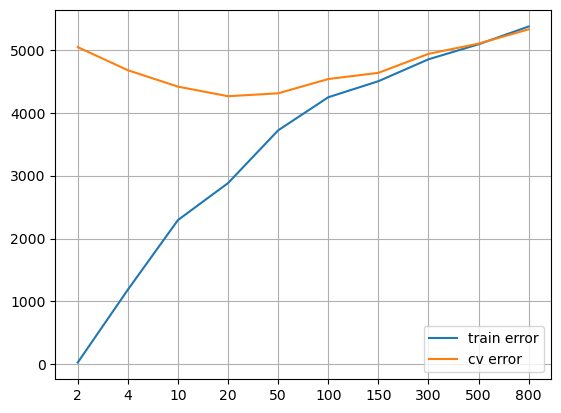

In [123]:
plt.plot(train_error)
plt.plot(cv_error)
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.legend(['train error', 'cv error'])
plt.grid()
plt.show()

In [124]:
max_depth_list = [2, 4, 6, 10, 16, 20, 30, 40, 50, 80]

train_error = []
cv_error = []

for max_depth in max_depth_list:
  model = DecisionTreeRegressor(max_depth=max_depth, random_state=1)
  model.fit(x_train, y_train)

  tr_yhat = model.predict(x_train)
  tr_mse = mean_squared_error(y_train, tr_yhat)
  train_error.append(np.sqrt(tr_mse))

  cv_yhat = model.predict(x_cv)
  cv_mse = mean_squared_error(y_cv, cv_yhat)
  cv_error.append(np.sqrt(cv_mse))

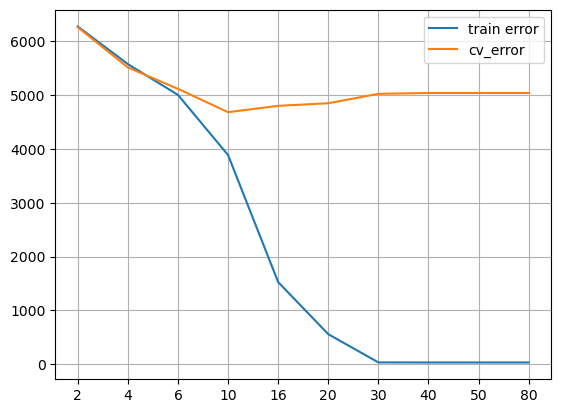

In [125]:
plt.plot(train_error)
plt.plot(cv_error)
plt.xticks(ticks=range(len(max_depth_list)), labels=max_depth_list)
plt.legend(['train error', 'cv_error'])
plt.grid()
plt.show()

# the best decision tree model

In [126]:
de_tree_model = DecisionTreeRegressor(min_samples_split=20,
                                            max_depth = 10,
                                            random_state = 1)
de_tree_model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_split=20, random_state=1)

In [127]:
train_yhat = de_tree_model.predict(x_train)
tr_mse = mean_squared_error(y_train, train_yhat)
print(f'train error {np.sqrt(tr_mse)}')

train error 4060.9791654253854


In [128]:
cv_yhat = de_tree_model.predict(x_cv)
cv_mse = mean_squared_error(y_cv, cv_yhat)
print(f'cv error {np.sqrt(cv_mse)}')

cv error 4627.122922201228


In [129]:
test_yhat = de_tree_model.predict(x_test)
test_mse = mean_squared_error(y_test, test_yhat)
print(f'test error {np.sqrt(test_mse)}')

test error 4512.689316873702


# Random forest algorithm development

In [21]:
min_samples_split_list = [ 2, 4, 10, 20, 50, 100]

train_error = []
cv_error = []

for min_split in min_samples_split_list:
  model = RandomForestRegressor(min_samples_split=min_split, random_state=1)
  model.fit(x_train, y_train)

  tr_yhat = model.predict(x_train)
  tr_mse = mean_squared_error(y_train, tr_yhat)
  train_error.append(np.sqrt(tr_mse))

  cv_yhat = model.predict(x_cv)
  cv_mse = mean_squared_error(y_cv, cv_yhat)
  cv_error.append(np.sqrt(cv_mse))


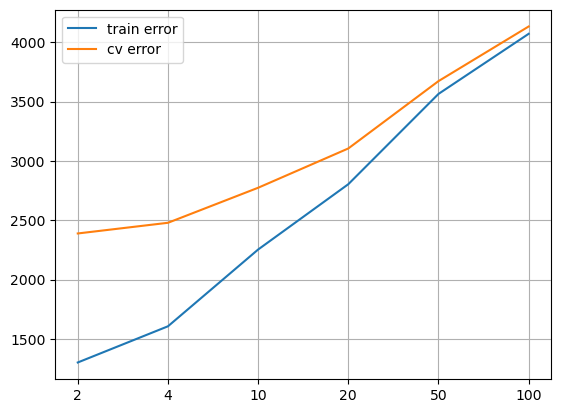

In [23]:
plt.plot(train_error)
plt.plot(cv_error)
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.legend(['train error', 'cv error'])
plt.grid()
plt.show()

In [24]:
max_depth_list = [2, 4, 6, 10, 16, 20, 30, 40, 50, 80]

train_error = []
cv_error = []

for max_depth in max_depth_list:
  model = RandomForestRegressor(max_depth=max_depth, random_state=1)
  model.fit(x_train, y_train)

  tr_yhat = model.predict(x_train)
  tr_mse = mean_squared_error(y_train, tr_yhat)
  train_error.append(np.sqrt(tr_mse))

  cv_yhat = model.predict(x_cv)
  cv_mse = mean_squared_error(y_cv, cv_yhat)
  cv_error.append(np.sqrt(cv_mse))

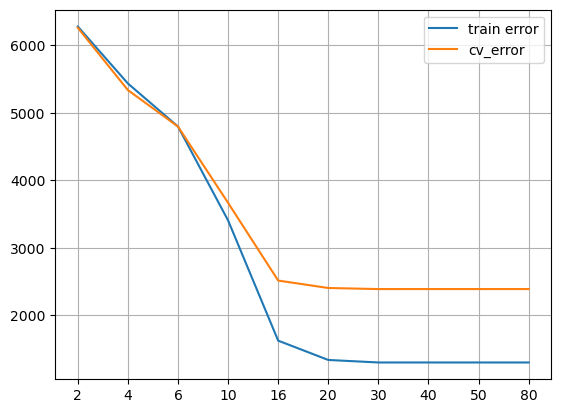

In [25]:
plt.plot(train_error)
plt.plot(cv_error)
plt.xticks(ticks=range(len(max_depth_list)), labels=max_depth_list)
plt.legend(['train error', 'cv_error'])
plt.grid()
plt.show()

In [26]:
n_estimators_list = [10,50,100,500, 600]
train_error = []
cv_error = []

for n_estimators in n_estimators_list:
  model = RandomForestRegressor(n_estimators = n_estimators, random_state=1)
  model.fit(x_train, y_train)

  tr_yhat = model.predict(x_train)
  tr_mse = mean_squared_error(y_train, tr_yhat)
  train_error.append(np.sqrt(tr_mse))

  cv_yhat = model.predict(x_cv)
  cv_mse = mean_squared_error(y_cv, cv_yhat)
  cv_error.append(np.sqrt(cv_mse))

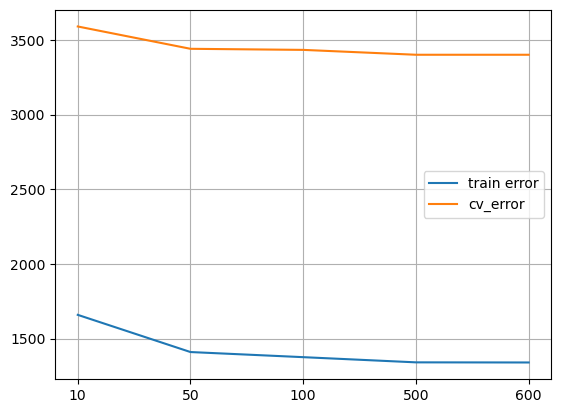

In [136]:
plt.plot(train_error)
plt.plot(cv_error)
plt.xticks(ticks=range(len(n_estimators_list)), labels=n_estimators_list)
plt.legend(['train error', 'cv_error'])
plt.grid()
plt.show()

# the perfect Random forest model

In [27]:
random_model = RandomForestRegressor(min_samples_split = 4,
                                     max_depth = 20,
                                     n_estimators = 500,
                                     random_state=1)
random_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_split=4, n_estimators=500,
                      random_state=1)

In [28]:
train_yhat = random_model.predict(x_train)
train_mse = mean_squared_error(y_train, train_yhat)
print(f'train error {np.sqrt(train_mse)}')

train error 1603.1911094083719


In [29]:
cv_yhat = random_model.predict(x_cv)
cv_mse = mean_squared_error(y_cv, cv_yhat)
print(f'cv error {np.sqrt(cv_mse)}')

cv error 2468.199722336336


In [30]:
test_yhat = random_model.predict(x_test)
test_mse = mean_squared_error(y_test, test_yhat)
print(f'test error {np.sqrt(test_mse)}')

test error 3575.2443368401864


# XGB

In [142]:
xgb_model = XGBRegressor(n_estimatos = 500,
                         learnin_rate=0.1,
                         verbosity = 1,
                         random_state=1)
xgb_model.fit(x_train, y_train)

[23:53:25] WARNING: ../src/learner.cc:767: 
Parameters: { "learnin_rate", "n_estimatos" } are not used.



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learnin_rate=0.1, learning_rate=None,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_estimatos=500, n_jobs=None,
             num_parallel_tree=None, ...)

In [143]:
train_yhat = xgb_model.predict(x_train)
train_mse = mean_squared_error(y_train, train_yhat)
print(f'train error {np.sqrt(train_mse)}')

train error 2306.85383634176


In [144]:
cv_yhat = xgb_model.predict(x_cv)
cv_mse = mean_squared_error(y_cv, cv_yhat)
print(f'train error {np.sqrt(train_mse)}')

train error 2306.85383634176


In [145]:
test_yhat = xgb_model.predict(x_test)
train_mse = mean_squared_error(y_test, test_yhat)
print(f'train error {np.sqrt(train_mse)}')

train error 3651.459008850354


# MY best model is Random Forest

In [32]:
test_data = pd.read_csv('/kaggle/input/aviachipta-narxini-bashorat-qilish/test_data.csv')
test_data.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,1,Air_India,AI-765,Kolkata,Evening,one,Night,Delhi,Business,28.25,2
1,2,Vistara,UK-747,Delhi,Early_Morning,one,Night,Mumbai,Business,13.83,34
2,3,Air_India,AI-570,Mumbai,Early_Morning,zero,Early_Morning,Chennai,Business,2.00,30
3,4,AirAsia,I5-974,Hyderabad,Night,one,Late_Night,Delhi,Economy,5.17,26
4,5,Air_India,AI-770,Kolkata,Night,one,Afternoon,Mumbai,Economy,16.33,35


In [33]:
encoder = OrdinalEncoder()
text = test_data[['airline', 'flight','source_city','departure_time','stops','arrival_time','destination_city','class']]
test_data[['airline', 'flight','source_city','departure_time','stops','arrival_time','destination_city','class']]=encoder.fit_transform(text)
test_data.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,1,1.0,452.0,4.0,2.0,0.0,5.0,2.0,0.0,28.25,2
1,2,5.0,834.0,2.0,1.0,0.0,5.0,5.0,0.0,13.83,34
2,3,1.0,401.0,5.0,1.0,2.0,1.0,1.0,0.0,2.00,30
3,4,0.0,723.0,3.0,5.0,0.0,3.0,2.0,1.0,5.17,26
4,5,1.0,456.0,4.0,5.0,0.0,0.0,5.0,1.0,16.33,35


In [36]:
test_data['waiting_time'] = (test_data['days_left'] * 24 - test_data['duration'])
test_data.drop('id', axis=1, inplace=True)
test_data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,waiting_time
0,1.0,452.0,4.0,2.0,0.0,5.0,2.0,0.0,28.25,2,19.75
1,5.0,834.0,2.0,1.0,0.0,5.0,5.0,0.0,13.83,34,802.17
2,1.0,401.0,5.0,1.0,2.0,1.0,1.0,0.0,2.00,30,718.00
3,0.0,723.0,3.0,5.0,0.0,3.0,2.0,1.0,5.17,26,618.83
4,1.0,456.0,4.0,5.0,0.0,0.0,5.0,1.0,16.33,35,823.67


In [37]:
predicted_values = random_model.predict(test_data)

In [41]:
sample = pd.read_csv('/kaggle/input/aviachipta-narxini-bashorat-qilish/sample_solution.csv')
sample.drop('id', axis=1, inplace=True)
sample.head()

,price
0,0
1,0
2,0
3,0
4,0


In [43]:
sample['price'] = predicted_values
sample

,price
0,55498.980056
1,45176.379452
2,25045.918322
3,3959.371878
4,8357.271129
...,...
4995,58653.701767
4996,4450.584486
4997,49964.615088
4998,50395.956212


In [44]:
sample.to_csv('submission_csv')
sample.head()

,price
0,55498.980056
1,45176.379452
2,25045.918322
3,3959.371878
4,8357.271129
